In [1]:
import pandas as pd
import pickle
import ast
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
train = pd.read_csv('./train/train.csv')
test = pd.read_csv('./test/test.csv')

In [3]:
train

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...",per:colleagues,wikipedia
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia


In [4]:
test

,id,sentence,subject_entity,object_entity,label,source
0,0,지난 15일 MBC '탐사기획 스트레이트'가 이 사실을 보도했다.,"{'word': 'MBC', 'start_idx': 7, 'end_idx': 9, ...","{'word': '탐사기획 스트레이트', 'start_idx': 12, 'end_i...",100,wikitree
1,1,사랑스러운 ‘프린세스 프링’의 이름은 봄의 공주님: Princess(s)Pring이...,"{'word': '프린세스 프링', 'start_idx': 7, 'end_idx':...","{'word': '공주', 'start_idx': 84, 'end_idx': 85,...",100,wikipedia
2,2,"한편, 본인(이근안)을 모델로 한 MBC 특집드라마 가 1995년 6.25 특집극으...","{'word': '경찰', 'start_idx': 121, 'end_idx': 12...","{'word': '1995년', 'start_idx': 31, 'end_idx': ...",100,wikipedia
3,3,정창손은 김질과 같이 대궐로 달려가 고변하며 '신은 실로 모르고 김질만 혼자 참여하...,"{'word': '세조', 'start_idx': 78, 'end_idx': 79,...","{'word': '정창손', 'start_idx': 0, 'end_idx': 2, ...",100,wikipedia
4,4,"당시 민주당 이진련 시의원은 권영진 시장에게 ""긴급 생계자금을 왜 현금으로 지원하지...","{'word': '민주당', 'start_idx': 3, 'end_idx': 5, ...","{'word': '권영진', 'start_idx': 16, 'end_idx': 18...",100,wikitree
...,...,...,...,...,...,...
7760,7760,코로나19 방역 조치의 일환으로 국민의 움직임을 통제하려는 정부의 시도를 이탈리아 ...,"{'word': '정부', 'start_idx': 33, 'end_idx': 34,...","{'word': '이탈리아', 'start_idx': 41, 'end_idx': 4...",100,wikitree
7761,7761,선 연구원은 “위식도역류질환치료제인 케이캡이 92억원 판매되면서 2019년 연간 3...,"{'word': '종근당', 'start_idx': 133, 'end_idx': 1...","{'word': '전년', 'start_idx': 143, 'end_idx': 14...",100,wikitree
7762,7762,"한국전기안전공사(사장 조성완)는 8월 1일부로, 3급 간부직원에 대한 승진·이동 인...","{'word': '한국전기안전공사', 'start_idx': 0, 'end_idx'...","{'word': '조성완', 'start_idx': 12, 'end_idx': 14...",100,wikitree
7763,7763,1987년 B. 슈나이더(B. Schneider)에 의해 만들어졌다.,"{'word': 'B. 슈나이더', 'start_idx': 6, 'end_idx':...","{'word': '1987년', 'start_idx': 0, 'end_idx': 4...",100,wikipedia


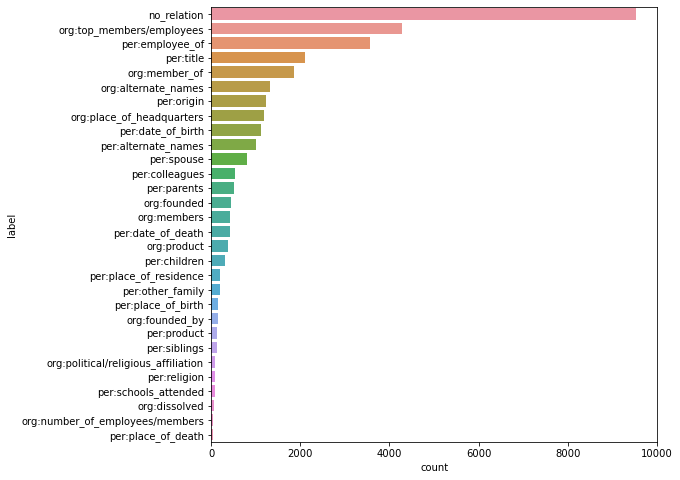

In [5]:
# label distribution
plt.figure(figsize=(8, 8))
sns.countplot(y="label", data=train, order = train['label'].value_counts().index)
plt.xlabel('count')
plt.ylabel('label')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


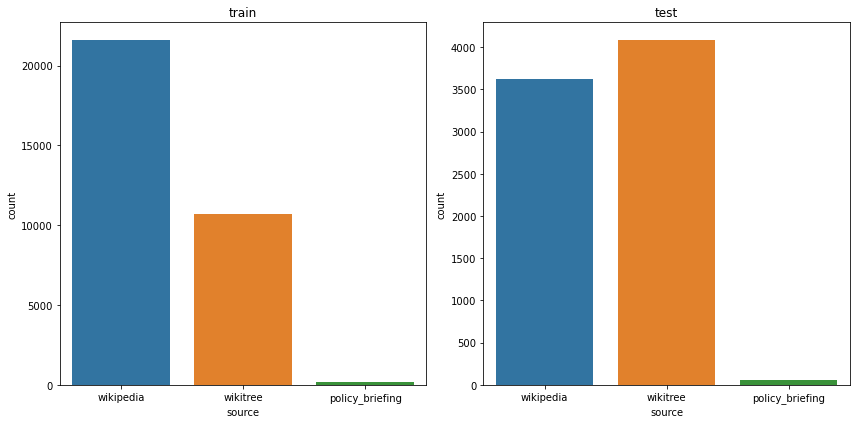

In [6]:
# source distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(train['source'], order=['wikipedia', 'wikitree', 'policy_briefing'], ax=axes[0])
axes[0].set_title('train')
sns.countplot(test['source'], order=['wikipedia', 'wikitree', 'policy_briefing'], ax=axes[1])
axes[1].set_title('test')
plt.tight_layout()
plt.show()

In [7]:
# seperate entity information(train)

subject_word, subject_start_idx, subject_end_idx, subject_type = [], [], [], []
for data in train['subject_entity']:
    data = ast.literal_eval(data)
    subject_word.append(data['word'])
    subject_start_idx.append(data['start_idx'])
    subject_end_idx.append(data['end_idx'])
    subject_type.append(data['type'])
train['subject_word'] = subject_word
train['subject_start_idx'] = subject_start_idx
train['subject_end_idx'] = subject_end_idx
train['subject_type'] = subject_type

object_word, object_start_idx, object_end_idx, object_type = [], [], [], []
for data in train['object_entity']:
    data = ast.literal_eval(data)
    object_word.append(data['word'])
    object_start_idx.append(data['start_idx'])
    object_end_idx.append(data['end_idx'])
    object_type.append(data['type'])
train['object_word'] = object_word
train['object_start_idx'] = object_start_idx
train['object_end_idx'] = object_end_idx
train['object_type'] = object_type

train.drop(columns=['subject_entity', 'object_entity'], inplace=True)

In [8]:
# seperate entity information(test)

subject_word, subject_start_idx, subject_end_idx, subject_type = [], [], [], []
for data in test['subject_entity']:
    data = ast.literal_eval(data)
    subject_word.append(data['word'])
    subject_start_idx.append(data['start_idx'])
    subject_end_idx.append(data['end_idx'])
    subject_type.append(data['type'])
test['subject_word'] = subject_word
test['subject_start_idx'] = subject_start_idx
test['subject_end_idx'] = subject_end_idx
test['subject_type'] = subject_type

object_word, object_start_idx, object_end_idx, object_type = [], [], [], []
for data in test['object_entity']:
    data = ast.literal_eval(data)
    object_word.append(data['word'])
    object_start_idx.append(data['start_idx'])
    object_end_idx.append(data['end_idx'])
    object_type.append(data['type'])
test['object_word'] = object_word
test['object_start_idx'] = object_start_idx
test['object_end_idx'] = object_end_idx
test['object_type'] = object_type

test.drop(columns=['subject_entity', 'object_entity'], inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


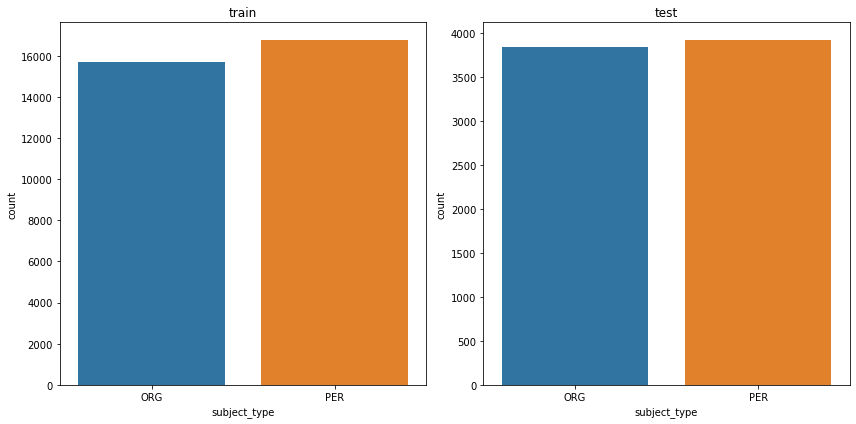

In [9]:
# subject_type distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(train['subject_type'], order=['ORG', 'PER'], ax=axes[0])
axes[0].set_title('train')
sns.countplot(test['subject_type'], order=['ORG', 'PER'], ax=axes[1])
axes[1].set_title('test')
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


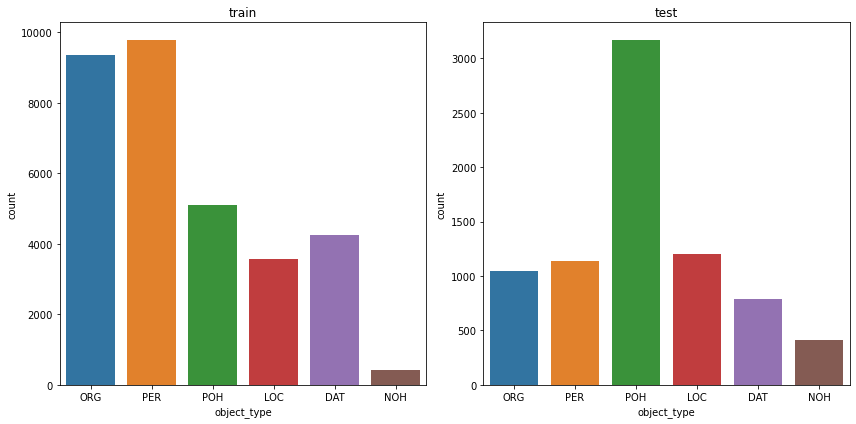

In [10]:
# subject_type distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(train['object_type'], order=['ORG','PER','POH','LOC','DAT','NOH'], ax=axes[0])
axes[0].set_title('train')
sns.countplot(test['object_type'], order=['ORG','PER','POH','LOC','DAT','NOH'], ax=axes[1])
axes[1].set_title('test')
plt.tight_layout()
plt.show()

In [11]:
# add entity_pair column(subject_type-object_type)
train['entity_pair'] = train['subject_type'] + "-" + train['object_type']
test['entity_pair'] = test['subject_type'] + "-" + test['object_type']

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


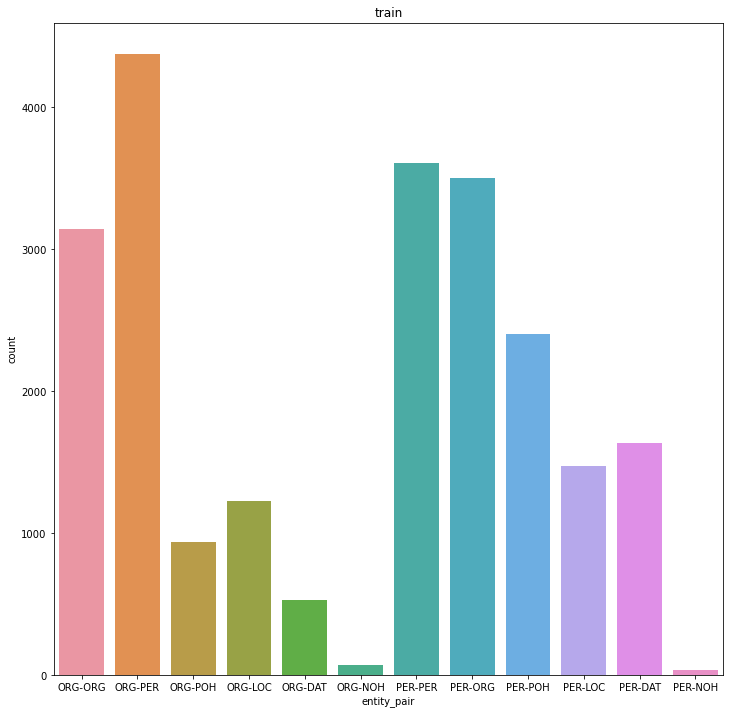

In [12]:
# entity_pair distribution(train)
plt.figure(figsize=(12, 12))
sns.countplot(train[train['label']!='no_relation']['entity_pair'], order=['ORG-ORG','ORG-PER','ORG-POH','ORG-LOC','ORG-DAT','ORG-NOH','PER-PER','PER-ORG','PER-POH','PER-LOC','PER-DAT','PER-NOH'])
plt.title('train')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


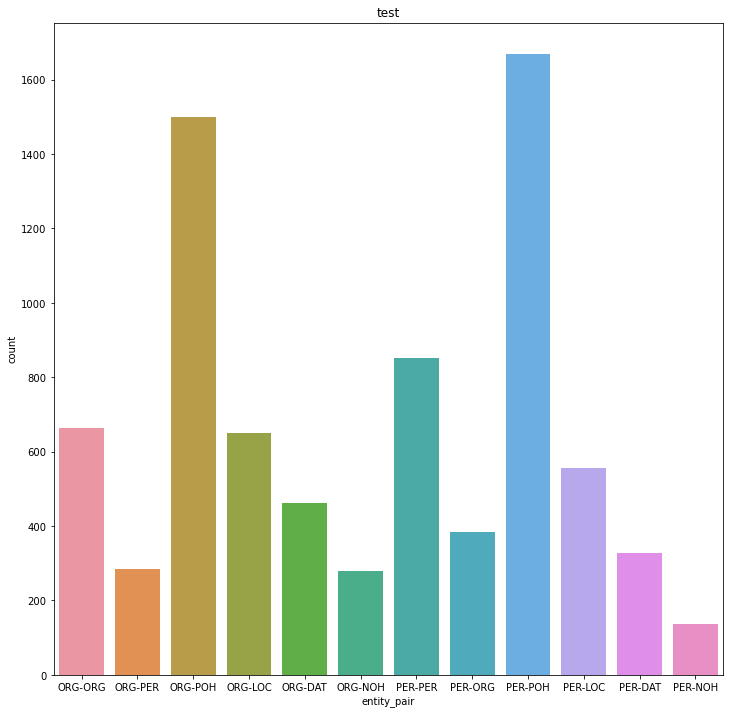

In [13]:
# entity_pair distribution(test)
plt.figure(figsize=(12, 12))
sns.countplot(test['entity_pair'], order=['ORG-ORG','ORG-PER','ORG-POH','ORG-LOC','ORG-DAT','ORG-NOH','PER-PER','PER-ORG','PER-POH','PER-LOC','PER-DAT','PER-NOH'])
plt.title('test')
plt.show()

In [14]:
label_to_num = {'no_relation': 0,
             'org:top_members/employees': 1,
             'org:members': 2,
             'org:product': 3,
             'per:title': 4,
             'org:alternate_names': 5,
             'per:employee_of': 6,
             'org:place_of_headquarters': 7,
             'per:product': 8,
             'org:number_of_employees/members': 9,
             'per:children': 10,
             'per:place_of_residence': 11,
             'per:alternate_names': 12,
             'per:other_family': 13,
             'per:colleagues': 14,
             'per:origin': 15,
             'per:siblings': 16,
             'per:spouse': 17,
             'org:founded': 18,
             'org:political/religious_affiliation': 19,
             'org:member_of': 20,
             'per:parents': 21,
             'org:dissolved': 22,
             'per:schools_attended': 23,
             'per:date_of_death': 24,
             'per:date_of_birth': 25,
             'per:place_of_birth': 26,
             'per:place_of_death': 27,
             'org:founded_by': 28,
             'per:religion': 29}

In [15]:
for idx, label in enumerate(label_to_num.keys()):
    subject_type_counter = Counter(train[train['label']==label]['subject_type']).most_common()
    object_type_counter = Counter(train[train['label']==label]['object_type']).most_common()
    
    print(f"{idx}. {label}")
    print(f"subject_type: {dict(subject_type_counter)}")
    print(f"object_type: {dict(object_type_counter)}")

0. no_relation
subject_type: {'ORG': 5406, 'PER': 4128}
object_type: {'ORG': 2699, 'DAT': 2087, 'PER': 1800, 'POH': 1780, 'LOC': 858, 'NOH': 310}
1. org:top_members/employees
subject_type: {'ORG': 4283, 'PER': 1}
object_type: {'PER': 4196, 'POH': 52, 'ORG': 22, 'LOC': 13, 'NOH': 1}
2. org:members
subject_type: {'ORG': 419, 'PER': 1}
object_type: {'ORG': 285, 'LOC': 97, 'POH': 32, 'PER': 3, 'NOH': 2, 'DAT': 1}
3. org:product
subject_type: {'ORG': 380}
object_type: {'POH': 304, 'ORG': 48, 'LOC': 24, 'PER': 3, 'NOH': 1}
4. per:title
subject_type: {'PER': 2103}
object_type: {'POH': 1845, 'ORG': 141, 'LOC': 81, 'NOH': 19, 'PER': 14, 'DAT': 3}
5. org:alternate_names
subject_type: {'ORG': 1320}
object_type: {'ORG': 1154, 'POH': 106, 'PER': 31, 'LOC': 23, 'NOH': 5, 'DAT': 1}
6. per:employee_of
subject_type: {'PER': 3573}
object_type: {'ORG': 2857, 'PER': 391, 'LOC': 165, 'POH': 135, 'DAT': 19, 'NOH': 6}
7. org:place_of_headquarters
subject_type: {'ORG': 1194, 'PER': 1}
object_type: {'LOC': 895

In [16]:
# 1. org:top_members/employees: 지정된 조직의 대표자 또는 구성원
# subject_type: {'ORG': 4283, 'PER': 1}
# object_type: {'PER': 4196, 'POH': 52, 'ORG': 22, 'LOC': 13, 'NOH': 1}

In [17]:
# PER
# train[(train['label']=='org:top_members/employees') & (train['subject_type']=='PER')]

In [18]:
# ORG
# train[(train['label']=='org:top_members/employees') & (train['object_type']=='ORG')]

In [19]:
# LOC
# train[(train['label']=='org:top_members/employees') & (train['object_type']=='LOC')]

In [20]:
# NOH
# train[(train['label']=='org:top_members/employees') & (train['object_type']=='NOH')]

In [21]:
# 2. org:members: 지정된 조직에 속한 조직, A⊃B
# subject_type: {'ORG': 419, 'PER': 1}
# object_type: {'ORG': 285, 'LOC': 97, 'POH': 32, 'PER': 3, 'NOH': 2, 'DAT': 1}

In [22]:
# PER
# train[(train['label']=='org:members') & (train['subject_type']=='PER')]

In [23]:
# PER
# train[(train['label']=='org:members') & (train['object_type']=='PER')]

In [24]:
# NOH
# train[(train['label']=='org:members') & (train['object_type']=='NOH')]

In [25]:
# DAT
# train[(train['label']=='org:members') & (train['object_type']=='DAT')]

In [26]:
# 3. org:product: 지정된 조직에서 생산된 제품 또는 상품
# subject_type: {'ORG': 380}
# object_type: {'POH': 304, 'ORG': 48, 'LOC': 24, 'PER': 3, 'NOH': 1}

In [27]:
# ORG
# train[(train['label']=='org:product') & (train['object_type']=='ORG')]

In [28]:
# LOC
# train[(train['label']=='org:product') & (train['object_type']=='LOC')]

In [29]:
# PER
# train[(train['label']=='org:product') & (train['object_type']=='PER')]

In [30]:
# NOH
# train[(train['label']=='org:product') & (train['object_type']=='NOH')]

In [31]:
# 4. per:title: 지정된 사람의 직업상 지위를 나타내는 공식 또는 비공식 명칭
# subject_type: {'PER': 2103}
# object_type: {'POH': 1845, 'ORG': 141, 'LOC': 81, 'NOH': 19, 'PER': 14, 'DAT': 3}

In [32]:
# ORG
# train[(train['label']=='per:title') & (train['object_type']=='ORG')]

In [33]:
# LOC
# train[(train['label']=='per:title') & (train['object_type']=='LOC')]

In [34]:
# NOH
# train[(train['label']=='per:title') & (train['object_type']=='NOH')]

In [35]:
# PER
# train[(train['label']=='per:title') & (train['object_type']=='PER')]

In [36]:
# DAT
# train[(train['label']=='per:title') & (train['object_type']=='DAT')]

In [37]:
# 5. org:alternate_names: 지정된 조직이 불리는 다른 이름
# subject_type: {'ORG': 1320}
# object_type: {'ORG': 1154, 'POH': 106, 'PER': 31, 'LOC': 23, 'NOH': 5, 'DAT': 1}

In [38]:
# PER
# train[(train['label']=='org:alternate_names') & (train['object_type']=='PER')]

In [39]:
# LOC
# train[(train['label']=='org:alternate_names') & (train['object_type']=='LOC')]

In [40]:
# NOH
# train[(train['label']=='org:alternate_names') & (train['object_type']=='NOH')]

In [41]:
# DAT
# train[(train['label']=='org:alternate_names') & (train['object_type']=='DAT')]

In [42]:
# 6. per:employee_of: 지정된 사람이 일하는 조직
# subject_type: {'PER': 3573}
# object_type: {'ORG': 2857, 'PER': 391, 'LOC': 165, 'POH': 135, 'DAT': 19, 'NOH': 6}

In [43]:
# DAT
# train[(train['label']=='per:employee_of') & (train['object_type']=='DAT')]

In [44]:
# NOH
# train[(train['label']=='per:employee_of') & (train['object_type']=='NOH')]

In [45]:
# 7. org:place_of_headquarters: 지정된 조직의 본사가 위치한 장소
# subject_type: {'ORG': 1194, 'PER': 1}
# object_type: {'LOC': 895, 'ORG': 254, 'POH': 39, 'DAT': 4, 'NOH': 2, 'PER': 1}

In [46]:
# PER
# train[(train['label']=='org:place_of_headquarters') & (train['subject_type']=='PER')]

In [47]:
# POH
# train[(train['label']=='org:place_of_headquarters') & (train['object_type']=='POH')]

In [48]:
# DAT
# train[(train['label']=='org:place_of_headquarters') & (train['object_type']=='DAT')]

In [49]:
# NOH
# train[(train['label']=='org:place_of_headquarters') & (train['object_type']=='NOH')]

In [50]:
# PER
# train[(train['label']=='org:place_of_headquarters') & (train['object_type']=='PER')]

In [51]:
# 8. per:product: 지정된 사람이 만든 제품 또는 예술품
# subject_type: {'PER': 139}
# object_type: {'POH': 120, 'ORG': 11, 'PER': 6, 'LOC': 2}

In [52]:
# ORG
# train[(train['label']=='per:product') & (train['object_type']=='ORG')]

In [53]:
# PER
# train[(train['label']=='per:product') & (train['object_type']=='PER')]

In [54]:
# LOC
# train[(train['label']=='per:product') & (train['object_type']=='LOC')]

In [55]:
# 9. org:number_of_employees/members: 지정된 조직에 구성된 총 구성원 수
# subject_type: {'ORG': 48}
# object_type: {'NOH': 48}

In [56]:
# 10. per:children: 지정된 사람의 자녀
# subject_type: {'PER': 304}
# object_type: {'PER': 275, 'POH': 22, 'LOC': 3, 'NOH': 2, 'DAT': 1, 'ORG': 1}

In [57]:
# POH
# train[(train['label']=='per:children') & (train['object_type']=='POH')]

In [58]:
# LOC
# train[(train['label']=='per:children') & (train['object_type']=='LOC')]

In [59]:
# NOH
# train[(train['label']=='per:children') & (train['object_type']=='NOH')]

In [60]:
# DAT
# train[(train['label']=='per:children') & (train['object_type']=='DAT')]

In [61]:
# ORG
# train[(train['label']=='per:children') & (train['object_type']=='ORG')]

In [62]:
# 11. per:place_of_residence: 지정된 사람이 거주하는 장소
# subject_type: {'PER': 193}
# object_type: {'LOC': 172, 'ORG': 11, 'POH': 6, 'DAT': 4}

In [63]:
# ORG
# train[(train['label']=='per:place_of_residence') & (train['object_type']=='ORG')]

In [64]:
# POH
# train[(train['label']=='per:place_of_residence') & (train['object_type']=='POH')]

In [65]:
# DAT
# train[(train['label']=='per:place_of_residence') & (train['object_type']=='DAT')]

In [66]:
# 12. per:alternate_names: 지정된 사람이 불리는 다른 이름
# subject_type: {'PER': 1001}
# object_type: {'PER': 881, 'POH': 70, 'ORG': 40, 'LOC': 9, 'NOH': 1}

In [67]:
# POH
# train[(train['label']=='per:alternate_names') & (train['object_type']=='POH')]

In [68]:
# ORG
# train[(train['label']=='per:alternate_names') & (train['object_type']=='ORG')]

In [69]:
# LOC
# train[(train['label']=='per:alternate_names') & (train['object_type']=='LOC')]

In [70]:
# NOH
# train[(train['label']=='per:alternate_names') & (train['object_type']=='NOH')]

In [71]:
# 13. per:other_family: 지정된 사람의 부모, 자녀, 형제자매 및 배우자 이외의 가족
# subject_type: {'PER': 190}
# object_type: {'PER': 178, 'POH': 7, 'LOC': 4, 'ORG': 1}

In [72]:
# POH
# train[(train['label']=='per:other_family') & (train['object_type']=='POH')]

In [73]:
# LOC
# train[(train['label']=='per:other_family') & (train['object_type']=='LOC')]

In [74]:
# ORG
# train[(train['label']=='per:other_family') & (train['object_type']=='ORG')]

In [75]:
# 14. per:colleagues: 지정된 사람과 함께 일하는 사람
# subject_type: {'PER': 534}
# object_type: {'PER': 512, 'ORG': 10, 'POH': 10, 'DAT': 1, 'LOC': 1}

In [76]:
# ORG
# train[(train['label']=='per:colleagues') & (train['object_type']=='ORG')]

In [77]:
# POH
# train[(train['label']=='per:colleagues') & (train['object_type']=='POH')]

In [78]:
# DAT
# train[(train['label']=='per:colleagues') & (train['object_type']=='DAT')]

In [79]:
# LOC
# train[(train['label']=='per:colleagues') & (train['object_type']=='LOC')]

In [80]:
# 15. per:origin: 지정된 사람의 출신 또는 국적
# subject_type: {'PER': 1234}
# object_type: {'LOC': 821, 'ORG': 267, 'DAT': 60, 'POH': 55, 'PER': 29, 'NOH': 2}

In [81]:
# DAT
# train[(train['label']=='per:origin') & (train['object_type']=='DAT')]

In [82]:
# POH
# train[(train['label']=='per:origin') & (train['object_type']=='POH')]

In [83]:
# PER
# train[(train['label']=='per:origin') & (train['object_type']=='PER')]

In [84]:
# NOH
# train[(train['label']=='per:origin') & (train['object_type']=='NOH')]

In [85]:
# 16. per:siblings: 지정된 사람의 형제자매
# subject_type: {'PER': 136}
# object_type: {'PER': 113, 'POH': 23}

In [86]:
# PER
# train[(train['label']=='per:siblings') & (train['object_type']=='PER')]

In [87]:
# POH
# train[(train['label']=='per:siblings') & (train['object_type']=='POH')]

In [88]:
# 17. per:spouse: 지정된 사람의 배우자
# subject_type: {'PER': 795}
# object_type: {'PER': 761, 'POH': 26, 'LOC': 6, 'ORG': 1, 'DAT': 1}

In [89]:
# POH
# train[(train['label']=='per:spouse') & (train['object_type']=='POH')]

In [90]:
# LOC
# train[(train['label']=='per:spouse') & (train['object_type']=='LOC')]

In [91]:
# ORG
# train[(train['label']=='per:spouse') & (train['object_type']=='ORG')]

In [92]:
# DAT
# train[(train['label']=='per:spouse') & (train['object_type']=='DAT')]

In [93]:
# 18. org:founded: 지정된 조직이 설립된 날짜
# subject_type: {'ORG': 450}
# object_type: {'DAT': 450}

In [94]:
# 19. org:political/religious_affiliation: 지정된 조직이 소속된 정치/종교 단체, A⊂B
# subject_type: {'ORG': 98}
# object_type: {'ORG': 54, 'POH': 38, 'LOC': 4, 'PER': 1, 'DAT': 1}

In [95]:
# POH
# train[(train['label']=='org:political/religious_affiliation') & (train['object_type']=='POH')]

In [96]:
# LOC
# train[(train['label']=='org:political/religious_affiliation') & (train['object_type']=='LOC')]

In [97]:
# PER
# train[(train['label']=='org:political/religious_affiliation') & (train['object_type']=='PER')]

In [98]:
# DAT
# train[(train['label']=='org:political/religious_affiliation') & (train['object_type']=='DAT')]

In [99]:
# 20. org:member_of: 지정된 조직이 속한 조직, A⊂B
# subject_type: {'ORG': 1866}
# object_type: {'ORG': 1320, 'POH': 358, 'LOC': 173, 'NOH': 9, 'DAT': 5, 'PER': 1}

In [100]:
# NOH
# train[(train['label']=='org:member_of') & (train['object_type']=='NOH')]

In [101]:
# DAT
# train[(train['label']=='org:member_of') & (train['object_type']=='DAT')]

In [102]:
# PER
# train[(train['label']=='org:member_of') & (train['object_type']=='PER')]

In [103]:
# 21. per:parents: 지정된 사람의 부모
# subject_type: {'PER': 520}
# object_type: {'PER': 443, 'POH': 64, 'LOC': 7, 'DAT': 5, 'NOH': 1}

In [104]:
# LOC
# train[(train['label']=='per:parents') & (train['object_type']=='POH')]

In [105]:
# LOC
# train[(train['label']=='per:parents') & (train['object_type']=='LOC')]

In [106]:
# DAT
# train[(train['label']=='per:parents') & (train['object_type']=='DAT')]

In [107]:
# NOH
# train[(train['label']=='per:parents') & (train['object_type']=='NOH')]

In [108]:
# 22. org:dissolved: 지정된 조직이 해산된 날짜
# subject_type: {'ORG': 66}
# object_type: {'DAT': 66}

In [109]:
# 23. per:schools_attended: 지정된 사람이 다녔던 학교
# subject_type: {'PER': 82}
# object_type: {'ORG': 80, 'LOC': 2}

In [110]:
# LOC
# train[(train['label']=='per:schools_attended') & (train['object_type']=='LOC')]

In [111]:
# 24. per:date_of_death: 지정된 사람이 사망한 날짜
# subject_type: {'PER': 418}
# object_type: {'DAT': 410, 'PER': 3, 'LOC': 2, 'NOH': 2, 'ORG': 1}

In [112]:
# PER
# train[(train['label']=='per:date_of_death') & (train['object_type']=='PER')]

In [113]:
# LOC
# train[(train['label']=='per:date_of_death') & (train['object_type']=='LOC')]

In [114]:
# NOH
# train[(train['label']=='per:date_of_death') & (train['object_type']=='NOH')]

In [115]:
# ORG
# train[(train['label']=='per:date_of_death') & (train['object_type']=='ORG')]

In [116]:
# 25. per:date_of_birth: 지정된 사람이 태어난 날짜
# subject_type: {'PER': 1130}
# object_type: {'DAT': 1128, 'NOH': 2}

In [117]:
# NOH
# train[(train['label']=='per:date_of_birth') & (train['object_type']=='NOH')]

In [118]:
# 26. per:place_of_birth: 지정된 사람이 태어난 장소
# subject_type: {'PER': 166}
# object_type: {'LOC': 161, 'ORG': 3, 'DAT': 1, 'PER': 1}

In [119]:
# ORG
# train[(train['label']=='per:place_of_birth') & (train['object_type']=='ORG')]

In [120]:
# DAT
# train[(train['label']=='per:place_of_birth') & (train['object_type']=='DAT')]

In [121]:
# PER
# train[(train['label']=='per:place_of_birth') & (train['object_type']=='PER')]

In [122]:
# 27. per:place_of_death: 지정된 사람이 사망한 장소
# subject_type: {'PER': 40}
# object_type: {'LOC': 35, 'POH': 2, 'ORG': 1, 'PER': 1, 'DAT': 1}

In [123]:
# POH
# train[(train['label']=='per:place_of_death') & (train['object_type']=='POH')]

In [124]:
# ORG
# train[(train['label']=='per:place_of_death') & (train['object_type']=='ORG')]

In [125]:
# PER
# train[(train['label']=='per:place_of_death') & (train['object_type']=='PER')]

In [126]:
# DAT
# train[(train['label']=='per:place_of_death') & (train['object_type']=='DAT')]

In [127]:
# 28. org:founded_by: 지정된 조직을 설립한 사람 또는 조직
# subject_type: {'ORG': 154, 'PER': 1}
# object_type: {'PER': 144, 'ORG': 5, 'POH': 5, 'LOC': 1}

In [128]:
# PER
# train[(train['label']=='org:founded_by') & (train['subject_type']=='PER')]

In [129]:
# ORG
# train[(train['label']=='org:founded_by') & (train['object_type']=='ORG')]

In [130]:
# POH
# train[(train['label']=='org:founded_by') & (train['object_type']=='POH')]

In [131]:
# LOC
# train[(train['label']=='org:founded_by') & (train['object_type']=='LOC')]

In [132]:
# 29. per:religion: 지정된 사람이 믿는 종교
# subject_type: {'PER': 96}
# object_type: {'ORG': 80, 'POH': 14, 'LOC': 2}

In [133]:
# POH
# train[(train['label']=='per:religion') & (train['object_type']=='POH')]

In [134]:
# LOC
# train[(train['label']=='per:religion') & (train['object_type']=='LOC')]